In [ ]:
#pip install plotly

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import json

In [2]:
food = pd.read_csv('../../Kaggle_DB/Daniel/Food_Supply_kcal_Data.csv')
#desc = pd.read_csv('Supply_Food_Data_Descriptions.csv')

In [3]:

food = food.fillna(0)
food.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,0,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [21]:
food.rename(columns = {'Vegetal Products':'식물성식품','Cereals - Excluding Beer':'곡물류','Pulses':'협과류','Starchy Roots':'뿌리채소','Sugar Crops':'사탕작물','Spices':'향신료','Aquatic Products, Other':'수산물','Offals':'육류부산물','Oilcrops':'유지작물','Fish, Seafood':'어류해산물','Miscellaneous':'기타류','Fruits - Excluding Wine':'과일류','Vegetables':'야채류','Treenuts':'견과류','Vegetable Oils':'식물성기름','Alcoholic Beverages':'주류음료','Stimulants':'강장식품','Eggs':'난류','Animal fats':'동물성지방','Meat':'육류','Milk - Excluding Butter':'유제품','Animal Products':'동물성식품','Sugar & Sweeteners':'당류'}, inplace = True)

In [22]:
food.columns

Index(['Country', '주류음료', '동물성식품', '동물성지방', '수산물', '곡물류', '난류', '어류해산물', '과일류',
       '육류', '유제품', '기타류', '육류부산물', '유지작물', '협과류', '향신료', '뿌리채소', '강장식품',
       '사탕작물', '당류', '견과류', '식물성식품', '식물성기름', '야채류', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)'],
      dtype='object')

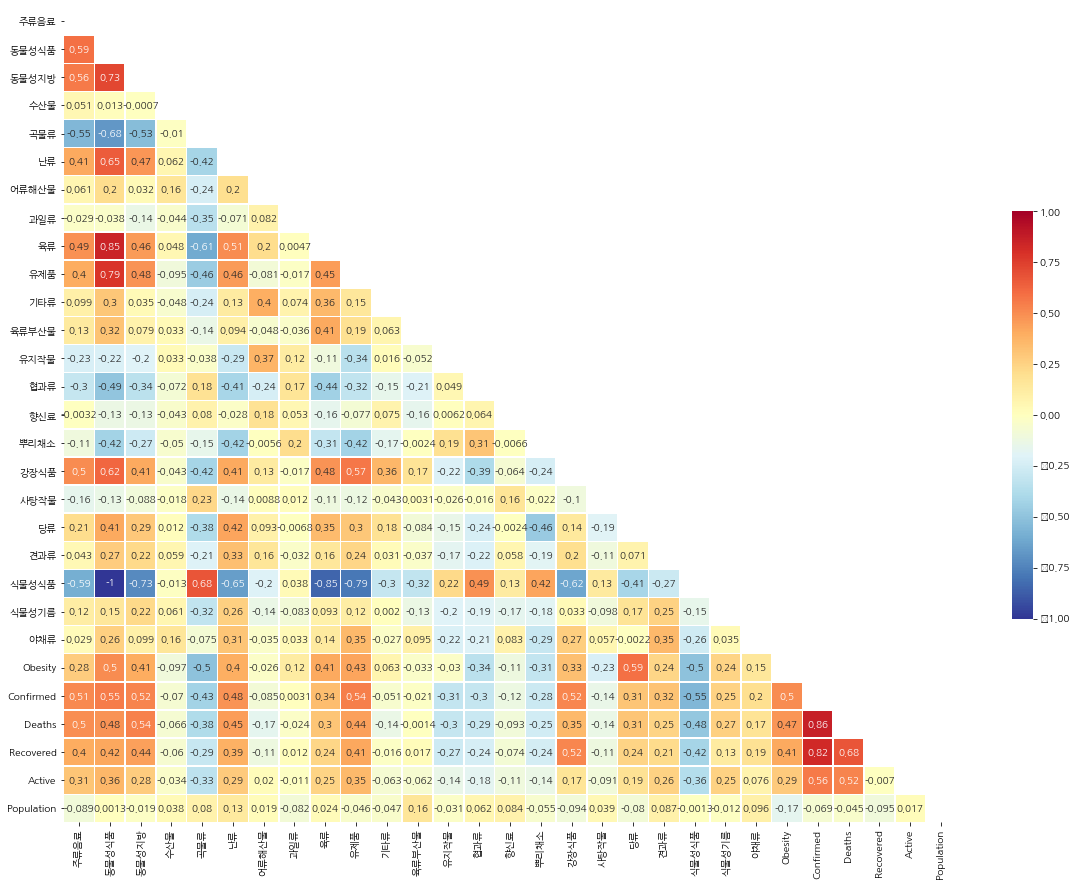

In [34]:
food_corr=food.corr()
fig,ax = plt.subplots(figsize=(20,15))
mask = np.zeros_like(food_corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(food_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": 0.5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

<AxesSubplot:>

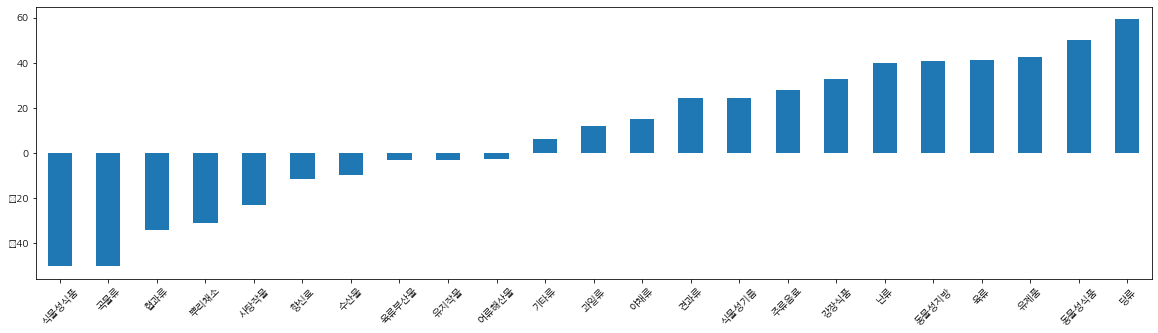

In [35]:
(food_corr.loc['Obesity'].iloc[:-6].sort_values()*100).plot.bar( rot=45,figsize=(20,5))


In [36]:
result=(food_corr.loc['Obesity'].iloc[:-6].sort_values()*100).to_json()


In [37]:
file = json.dumps(result,indent=4)
with open("Obesity_nutrition.json","w") as outfile :
        outfile.write(file)